In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
# conda install scikit-learn Version=1.4.2
from sklearn.tree import DecisionTreeRegressor, plot_tree # had to sign out for it to work
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt # to plot decision trees


# Table of contents

1. [Introduction](#introduction)
2. [Decision tree Regressor](#dtr)
3. [GradientBoostingRegressor](#gba)
4. [Support Vector Regressor (SVR)](#svr)
5. []
6. [Support Vector Regressor (SVR)](#res)


## Introduction <a name="introduction"></a>
This ipynb file uses the preproccesed df to train multiple ml models and evaluetes which one has the best accuraccy.



In [2]:
# Load the DataFrame from the pickle file
df = pd.read_pickle('final_dataframe.pkl')


In [3]:
# Define feature columns and target variable
columns_x = ['size', 'distance_hospital', 'lr_day', 'lr_night', 'distance_ov', 'wbauj', 'modern',
             'erstvermietung', 'zentral', 'see', 'neu', 'stöckig', 'traum', 'bijou', 'neubau',
             'balkon', 'charmant', 'erstbezug', '1 Zimmer', '1.5 Zimmer', '2 Zimmer', '2.5 Zimmer',
             '3 Zimmer', '3.5 Zimmer', '4 Zimmer', '4.5 Zimmer', '5 Zimmer', '5.5 Zimmer',
             '6 Zimmer', '6.5 Zimmer', '7 Zimmer', '7.5 Zimmer', 'y0', 'y1999', 'y2000', 'y2001',
             'y2003', 'y2004', 'y2005', 'y2006', 'y2008', 'y2009', 'y2010', 'y2011', 'y2012',
             'y2013', 'y2014', 'y2015', 'y2016', 'y2017', 'y2018', 'y2019', 'y2020', 'y2021',
             'y2022', 'y2023', 'y2024']

X = df[columns_x]
y = df['price']

## Decision Tree Regressor <a name="dtr"></a>
A Decision Tree Regressor is a type of machine learning model used for predicting continuous numerical outcomes. It works by recursively splitting the df into subsets based on feature values, creating a tree-like structure. 

Advantages:
- Simple to understand and interpret.
- Can capture non-linear relationships.
- Requires little df preprocessing.

Disadvantages:
- Prone to overfitting, especially with deep trees.
- Can be unstable with small variations in df.

In [4]:


# Split the dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=6, random_state=42) #the lower the max depth the better the r² score 3 or 4 i although mean squared error gets better over time

# Train the model
tree_reg.fit(X_train, y_train)

# Predict using the model
y_pred = tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 935244.1091009355
R^2 Score: 0.5486208622387497


In [17]:


# Create a pipeline with a Decision Tree Regressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define the hyperparameters and their values for grid search
param_grid = {
    'regressor__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Initialize RepeatedKFold for 5 repetitions with 80:20 splits
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Initialize GridSearchCV with the pipeline, hyperparameters, and RepeatedKFold
grid_search = GridSearchCV(pipeline, param_grid, cv=rkf, scoring='r2', n_jobs=-1, verbose=2)

# Train the models
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using the test set split once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mse ** 0.5

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Fitting 25 folds for each of 72 candidates, totalling 1800 fits
Best Parameters: {'regressor__max_depth': 7, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 10}
Mean Squared Error: 680834.3048443847
Root Mean Squared Error (RMSE): 825.1268416700457
R^2 Score: 0.6714072844849409


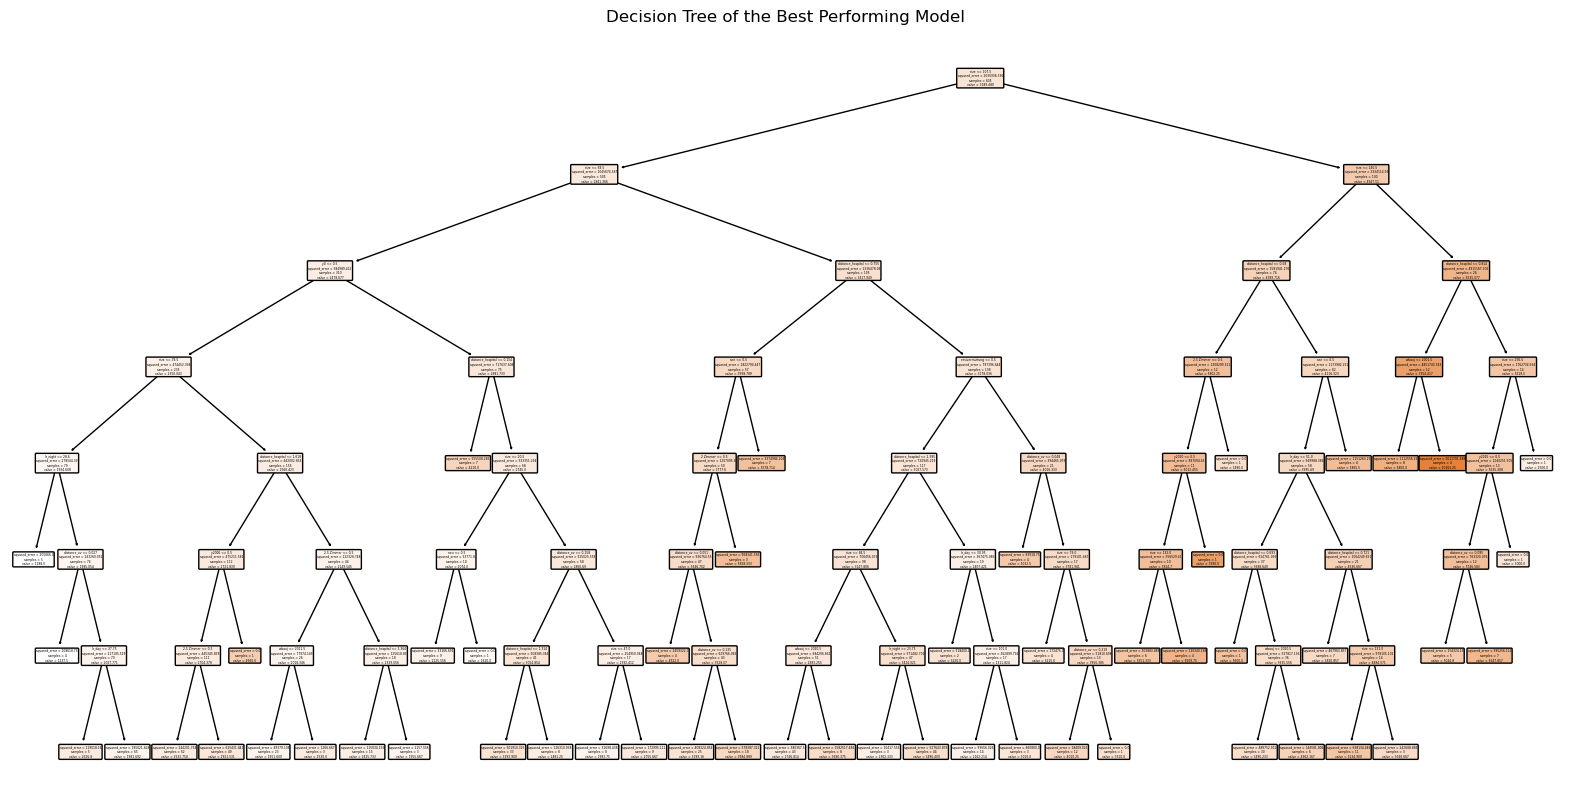

In [18]:
# Plot the decision tree of the best model
plt.figure(figsize=(20,10))
plot_tree(best_model.named_steps['regressor'], feature_names=columns_x, filled=True, rounded=True)
plt.title("Decision Tree of the Best Performing Model")
plt.show()

In [6]:
print('Shape df before removing outliers:',df.shape)

Shape df before removing outliers: (757, 65)


In [7]:
# Calculate the z-scores for the 'price' column
df['price_zscore'] = zscore(df['price'])

# Define the z-score threshold
z_score_threshold = 3  # Typically, a z-score threshold of 3 is used

# Filter the dataframe to remove rows where the 'price' z-score is above the threshold
df = df[df['price_zscore'].abs() <= z_score_threshold]

# Drop the z-score column as it's no longer needed
df = df.drop(columns=['price_zscore'])

print('Shape df after removing outliers:',df.shape)

Shape df after removing outliers: (744, 65)


In [9]:
# Create a pipeline with a Decision Tree Regressor
pipeline = Pipeline([
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define the hyperparameters and their values for grid search
param_grid = {
    'regressor__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Initialize RepeatedKFold for 5 repetitions with 80:20 splits
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Initialize GridSearchCV with the pipeline, hyperparameters, and RepeatedKFold
grid_search = GridSearchCV(pipeline, param_grid, cv=rkf, scoring='r2', n_jobs=-1, verbose=2)

# Train the models
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using the test set split once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mse ** 0.5

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Fitting 25 folds for each of 72 candidates, totalling 1800 fits
Best Parameters: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 10}
Mean Squared Error: 727447.0666119282
Root Mean Squared Error (RMSE): 852.9050747955063
R^2 Score: 0.4734417621552528


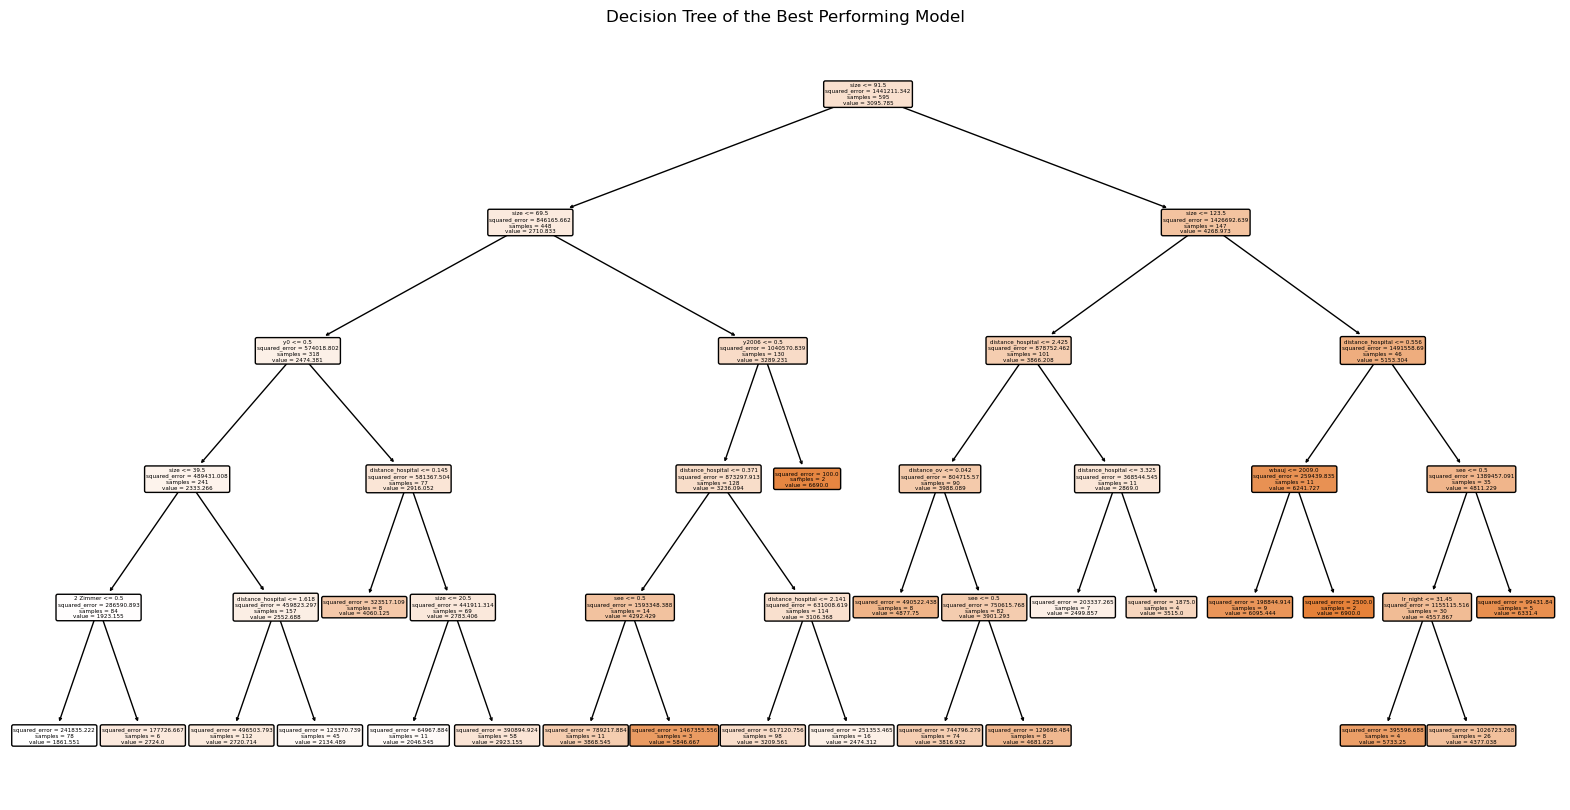

In [10]:
# Plot the decision tree of the best model
plt.figure(figsize=(20,10))
plot_tree(best_model.named_steps['regressor'], feature_names=columns_x, filled=True, rounded=True)
plt.title("Decision Tree of the Best Performing Model")
plt.show()

In [15]:
# Load the DataFrame from the pickle file as the model performs better without exluding outliers
df = pd.read_pickle('final_dataframe.pkl')

## GradientBoostingRegressor <a name="gbr"></a>

GradientBoostingRegressor is a machine learning model belonging to the ensemble learning method known as gradient boosting, specifically tailored for regression tasks. It builds up on an ensemble learning technique where multiple models are trained sequentially, with each new model attempting to correct the errors made by the previous ones.

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
#Takes a while to execute so beware

# Define feature columns and target variable
columns_x = ['size', 'distance_hospital', 'lr_day', 'lr_night', 'distance_ov', 'wbauj', 'modern',
             'erstvermietung', 'zentral', 'see', 'neu', 'stöckig', 'traum', 'bijou', 'neubau',
             'balkon', 'charmant', 'erstbezug', '1 Zimmer', '1.5 Zimmer', '2 Zimmer', '2.5 Zimmer',
             '3 Zimmer', '3.5 Zimmer', '4 Zimmer', '4.5 Zimmer', '5 Zimmer', '5.5 Zimmer',
             '6 Zimmer', '6.5 Zimmer', '7 Zimmer', '7.5 Zimmer', 'y0', 'y1999', 'y2000', 'y2001',
             'y2003', 'y2004', 'y2005', 'y2006', 'y2008', 'y2009', 'y2010', 'y2011', 'y2012',
             'y2013', 'y2014', 'y2015', 'y2016', 'y2017', 'y2018', 'y2019', 'y2020', 'y2021',
             'y2022', 'y2023', 'y2024']

X = df[columns_x]
y = df['price']

pipeline = Pipeline([
    ('regressor', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5, 6],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
# Initialize RepeatedKFold for 5 repetitions with 80:20 splits
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Initialize GridSearchCV with the pipeline, hyperparameters, and RepeatedKFold
grid_search = GridSearchCV(pipeline, param_grid, cv=rkf, scoring='r2', n_jobs=-1, verbose=2)

# Train the models
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using the test set split once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mse ** 0.5

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Fitting 25 folds for each of 324 candidates, totalling 8100 fits
Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 4, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Mean Squared Error: 430562.6446702702
Root Mean Squared Error (RMSE): 656.1727247228965
R^2 Score: 0.7921965041936496



## Support Vector Regressor (SVR) <a name="svr"></a>

Support Vector Regressor (SVR) is a supervised machine learning algorithm used for regression tasks. It works by finding the hyperplane that best fits the data such that the margin (distance between the hyperplane and the nearest data point) is maximized. SVR is effective in high-dimensional spaces and is particularly useful when the number of features is greater than the number of samples. It uses a subset of training points (support vectors) in the decision function, making it memory efficient. Additionally, SVR allows for the use of different kernel functions to transform the input space, enabling non-linear regression.

In [20]:
from sklearn.svm import SVR


pipeline = Pipeline([
    ('regressor', SVR())
])

param_grid = {
    'regressor__kernel': ['linear', 'poly', 'rbf'],
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__epsilon': [0.1, 0.2, 0.5]
}

# Initialize RepeatedKFold for 5 repetitions with 80:20 splits
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Initialize GridSearchCV with the pipeline, hyperparameters, and RepeatedKFold
grid_search = GridSearchCV(pipeline, param_grid, cv=rkf, scoring='r2', n_jobs=-1, verbose=2)

# Train the models
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using the test set split once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mse ** 0.5

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Fitting 25 folds for each of 36 candidates, totalling 900 fits
Best Parameters: {'regressor__C': 10, 'regressor__epsilon': 0.1, 'regressor__kernel': 'linear'}
Mean Squared Error: 682285.5265636815
Root Mean Squared Error (RMSE): 826.0057666649075
R^2 Score: 0.6707068778189355


XGBoost Regressor:

In [13]:
from xgboost import XGBRegressor

pipeline = Pipeline([
    ('regressor', XGBRegressor(random_state=42, tree_method='gpu_hist', gpu_id=0))
])

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5, 6],
    'regressor__subsample': [0.7, 0.8, 0.9, 1.0]
}

# Initialize RepeatedKFold for 5 repetitions with 80:20 splits
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Initialize GridSearchCV with the pipeline, hyperparameters, and RepeatedKFold
grid_search = GridSearchCV(pipeline, param_grid, cv=rkf, scoring='r2', n_jobs=-1, verbose=2)

# Train the models
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using the test set split once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mse ** 0.5

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Fitting 25 folds for each of 144 candidates, totalling 3600 fits


ValueError: 
All the 3600 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\sklearn.py", line 1055, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\sklearn.py", line 521, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\sklearn.py", line 958, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 1529, in __init__
    self._init(
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 1588, in _init
    it.reraise()
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 576, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 557, in _handle_exception
    return fn()
           ^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\data.py", line 1280, in next
    input_data(**self.kwargs)
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 624, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\data.py", line 1315, in _proxy_transform
    arr, feature_names, feature_types = _transform_pandas_df(
                                        ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\data.py", line 490, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\data.py", line 308, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:size: object


In [ ]:
# Initialize RepeatedKFold for 5 repetitions with 80:20 splits
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Initialize GridSearchCV with the pipeline, hyperparameters, and RepeatedKFold
grid_search = GridSearchCV(pipeline, param_grid, cv=rkf, scoring='r2', n_jobs=-1, verbose=2)

# Train the models
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using the test set split once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mse ** 0.5

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Fitting 25 folds for each of 144 candidates, totalling 3600 fits


ValueError: 
All the 3600 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\sklearn.py", line 1055, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\sklearn.py", line 521, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\sklearn.py", line 958, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 1529, in __init__
    self._init(
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 1588, in _init
    it.reraise()
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 576, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 557, in _handle_exception
    return fn()
           ^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\data.py", line 1280, in next
    input_data(**self.kwargs)
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\core.py", line 624, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\data.py", line 1315, in _proxy_transform
    arr, feature_names, feature_types = _transform_pandas_df(
                                        ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\data.py", line 490, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\xgboost\data.py", line 308, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:size: object


In [ ]:
from catboost import CatBoostRegressor

pipeline = Pipeline([
    ('regressor', CatBoostRegressor(random_state=42, silent=True))
])

param_grid = {
    'regressor__iterations': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__depth': [3, 4, 5, 6]
}

# Initialize RepeatedKFold for 5 repetitions with 80:20 splits
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Initialize GridSearchCV with the pipeline, hyperparameters, and RepeatedKFold
grid_search = GridSearchCV(pipeline, param_grid, cv=rkf, scoring='r2', n_jobs=-1, verbose=2)

# Train the models
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using the test set split once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mse ** 0.5

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

| Model               | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) | R^2 Score | 
|---------------------|--------------------------|--------------------------------|-----------|
| Decision Tree Regressor      | 680834.30                | 825.13                         | 0.67      |
| GradientBoostingRegressor    | 430562.64                | 656.17                         | 0.79      |
| Support Vector Regressor (SVR)| 682285.52                | 656.17                         | 0.79      |